In [1]:
from dynRespCompare import *

## EGR Percent

In [2]:
printDescribes([egrPercent, rpm], dfList)


1
       EGR Commanded(%)  Engine RPM(rpm)
count         42.000000        42.000000
mean           3.921569       716.214286
std            1.775038       297.306899
min            0.000000         0.000000
25%            4.705883       819.000000
50%            4.705883       820.000000
75%            4.705883       827.000000
max            4.705883       935.000000
2
       EGR Commanded(%)  Engine RPM(rpm)
count        764.000000       764.000000
mean          22.421210      1513.756545
std           15.832993       407.518647
min            4.705883       771.000000
25%            4.705883      1281.000000
50%           33.725491      1555.000000
75%           36.470589      1841.500000
max           48.235294      2403.000000
3
       EGR Commanded(%)  Engine RPM(rpm)
count        318.000000       318.000000
mean          13.679862       801.481132
std           14.214200       277.023199
min            0.000000         0.000000
25%            4.705883       812.750000
50%       

egrPercent seem ideal, has a good median value that is mostly consistent

## Turbo Boost

In [3]:
printDescribes([boost, rpm, coolantTemp], dfList)


1
       Turbo Boost & Vacuum Gauge(psi)  Engine RPM(rpm)  \
count                        42.000000        42.000000   
mean                         -0.023562       716.214286   
std                           0.057643       297.306899   
min                          -0.051188         0.000000   
25%                          -0.051188       819.000000   
50%                          -0.051188       820.000000   
75%                          -0.051188       827.000000   
max                           0.093849       935.000000   

       Engine Coolant Temperature(°C)  
count                       42.000000  
mean                        33.476190  
std                          0.594204  
min                         32.000000  
25%                         33.000000  
50%                         34.000000  
75%                         34.000000  
max                         34.000000  
2
       Turbo Boost & Vacuum Gauge(psi)  Engine RPM(rpm)  \
count                       764.000000       

Not reliable, depending on the coolant temperature at the start. Is reliable when coolant temperature starts low, but when the weather is warm this is if no use

## Fuel Rail Pressure

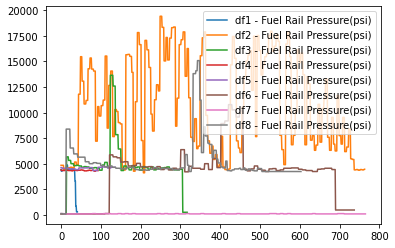

In [4]:
plotValsMultDfsHasValue([fuelRailP], dfList)


Difficult to find a pattern here.
After some investigation, found that the FRP while RPM was at 0 might be consistent looking at this graph

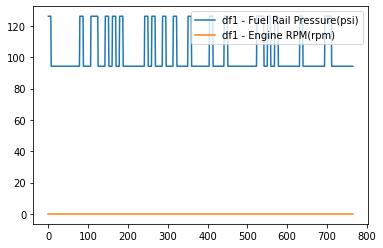

In [5]:
    plotValsMultDfsHasValue([fuelRailP, rpm], [accord7])


1
       Fuel Rail Pressure(psi)  Engine Coolant Temperature(°C)
count                 6.000000                             6.0
mean                981.905482                            34.0
std                1176.680004                             0.0
min                 285.724335                            34.0
25%                 285.724335                            34.0
50%                 572.899063                            34.0
75%                 860.073791                            34.0
max                3314.112305                            34.0
2
       Fuel Rail Pressure(psi)  Engine Coolant Temperature(°C)
count                      0.0                             0.0
mean                       NaN                             NaN
std                        NaN                             NaN
min                        NaN                             NaN
25%                        NaN                             NaN
50%                        NaN                     

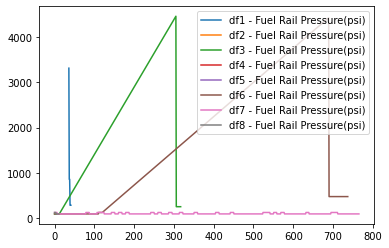

In [6]:
printDescribes([fuelRailP, coolantTemp], dfList0Rpms)
plotValsMultDfsHasValue([fuelRailP], dfList0Rpms)

Coolant temperature seems to be again the factor that throws off this, same as with turbo boost

In [7]:
accord6.corr()

,0100,011c obd standards vehicle conforms to,0120,0903,Distance travelled with MIL/CEL lit(miles),EGR Commanded(%),EGR Error(%),Engine Coolant Temperature(°C),Engine Load(%),Engine RPM(rpm),...,Kilometers Per Litre(Long Term Average)(kpl),Litres Per 100 Kilometer(Long Term Average)(l/100km),Mass Air Flow Rate(g/s),Miles Per Gallon(Instant)(mpg),Miles Per Gallon(Long Term Average)(mpg),pids supported 01-20,0900,Speed (OBD)(mph),Turbo Boost & Vacuum Gauge(psi),Voltage (OBD Adapter)(V)
0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
011c obd standards vehicle conforms to,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance travelled with MIL/CEL lit(miles),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EGR Commanded(%),NaN,NaN,NaN,NaN,NaN,1.000000,NaN,-0.358640,0.378849,0.456743,...,-0.031115,0.031518,0.450320,0.057996,-0.031118,NaN,0.989026,0.092462,-0.330050,0.213850
EGR Error(%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Coolant Temperature(°C),NaN,NaN,NaN,NaN,NaN,-0.358640,NaN,1.000000,0.117970,0.277136,...,0.179495,-0.178879,0.252793,0.134573,0.179494,NaN,-0.362619,0.137391,-0.262828,0.473023
Engine Load(%),NaN,NaN,NaN,NaN,NaN,0.378849,NaN,0.117970,1.000000,0.781643,...,-0.531818,0.532595,0.779300,-0.039543,-0.531822,NaN,0.376010,0.358352,-0.412139,0.695596
Engine RPM(rpm),NaN,NaN,NaN,NaN,NaN,0.456743,NaN,0.277136,0.781643,1.000000,...,-0.234560,0.235259,0.995355,0.176277,-0.234563,NaN,0.461811,0.415796,-0.617008,0.869427


There are possible correlations here, between coolant temperature and each of Turbo Boost, Fuel Rail Pressure and Mass Air Flow rate

## Volumetric Efficiency


In [8]:
printDescribes(volEff, convertDfsColsToNums(dfList, volEff))

1
count    38.000000
mean     78.210526
std       4.668224
min      59.000000
25%      79.000000
50%      79.000000
75%      80.000000
max      81.000000
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
2
count    758.000000
mean      64.935356
std       18.090694
min       32.000000
25%       49.000000
50%       63.000000
75%       82.000000
max      100.000000
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
3
count    299.000000
mean      68.123746
std       13.854036
min       43.000000
25%       56.500000
50%       75.000000
75%       80.000000
max       84.000000
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
4
count    93.000000
mean     76.903226
std       0.723285
min      76.000000
25%      76.000000
50%      77.000000
75%      77.000000
max      78.000000
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
5
count    137.000000
mean      78.138686
std        0.608548
min       77.000000
25%       78.000000
50%       78.000000
75%   

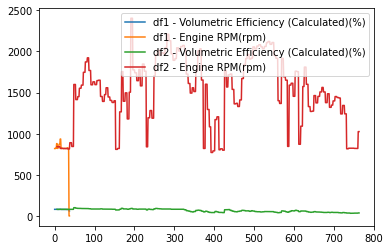

In [9]:
plotValsMultDfsHasValue([volEff, rpm], convertDfsColsToNums([accord1, accord2], volEff))

In [10]:
printDescribes(volEff, convertDfsColsToNums(dfList0Rpms, volEff))


1
count     2.0
mean     59.0
std       0.0
min      59.0
25%      59.0
50%      59.0
75%      59.0
max      59.0
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
2
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
3
count    13.0
mean     58.0
std       0.0
min      58.0
25%      58.0
50%      58.0
75%      58.0
max      58.0
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
4
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
5
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
6
count    49.0
mean     59.0
std       0.0
min      59.0
25%      59.0
50%      59.0
75%      59.0
max      59.0
Name: Volumetric Efficiency (Calculated)

Very finicky but could use. When RPM is 0 then value is 58 or 59, but was wrongly 0 once, so need to add that additional check. Often gives nan though, so am deciding not to use

## Summary
That is all the useful dynamic responses form the 08 Accord

* RPM
    * take once engine has heated up, past 25 or 30 degrees
    * Take median after that assuming the engine is left idling
    * The min dips occasionally so that cannot be taken, hence take the median instead
    * Varies slightly from 819 to 821
* EGR Percent
    * Take while engine has not started, so RPM is at 0
    * Looks to be a constant then
    * take median or bottom quartile seems good when engine has been started, but can just filter out where rpm is not 0
* Volumetric Efficiency
    * Value was not captured sometimes
    * When engine not started (RPM at 0) then seems stable, at 58 or 59
    * Check to make sure the RPM is not "-" and is at 0
    * in practice sometimes does not collect anything so is not reliable and decided not to use